In [46]:
#Importing libraries for data preprocessing
import pandas as pnd
import numpy as nmp
import seaborn as sns
import matplotlib.pyplot as mpt

In [47]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
#loading dataset
train_data = pnd.read_csv(r"/Users/ishanshekharjha/Downloads/cs-training.csv").drop(['Unnamed: 0'],axis=1)
test_data = pnd.read_csv(r"/Users/ishanshekharjha/Downloads/cs-test.csv").drop(['Unnamed: 0'],axis=1)

In [49]:
train_data.shape

(150000, 11)

In [50]:
test_data.shape

(101503, 11)

In [51]:
train_redup = train_data.drop_duplicates()

In [52]:
#Calculating the percentage of null values in each column
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [53]:
#Displaying the null values' percentage in each column
train_redup.shape
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [54]:
#Filtering the rows with null value of "MonthIncome" column
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [55]:
#Calculating the mode of the 'NumberOfDependents' column
train_redup['NumberOfDependents'].agg(lambda x: x.mode().iloc[0])

0.0

In [56]:
#Splitting the 'NumberOfDependants' column based on the values(null/not null)
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [57]:
#Finding the percentage of missing values in 'fam_miss' dataframe
findMiss(fam_miss)

SeriousDlqin2yrs                          0.0
RevolvingUtilizationOfUnsecuredLines      0.0
age                                       0.0
NumberOfTime30-59DaysPastDueNotWorse      0.0
DebtRatio                                 0.0
MonthlyIncome                           100.0
NumberOfOpenCreditLinesAndLoans           0.0
NumberOfTimes90DaysLate                   0.0
NumberRealEstateLoansOrLines              0.0
NumberOfTime60-89DaysPastDueNotWorse      0.0
NumberOfDependents                      100.0
dtype: float64

In [58]:
#Finding the percentage of missing values in 'fam_nmiss' dataframe
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [59]:
#Calculating mean, median and mode of 'MonthlyIncome' column
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [60]:
#Concatinating 'fam_miss' and 'fam_nmiss' columns
filled_train = pnd.concat([fam_nmiss, fam_miss], axis=0, ignore_index=True)

In [61]:
#Finding the percentage of missing values in 'filled_train' dataframe
findMiss(filled_train)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [62]:
#First few rows of 'filled_train' dataframe.
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [63]:
#Calculating the proportions of each category in the 'SeriousDlqin2yrs' column in the 'filled_train' dataframe
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [64]:
#Descriptive statistics of the 'RevolvingUtilizationOfUnsecuredLines' column
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [65]:
#Calculating the 99th Percentile of the 'RevolvingUtilizationOfUnsecuredLines' column
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [66]:
#Descriptive statistics of rows where 'RevolvingUtilizationOfUnsecuredLines'>10
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,241.000000,241.000000,241.000000,241.000000,228.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,8467.67052,5.763485,0.074689,1.186722,0.087137,0.688596
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,6564.06825,3.114160,0.579711,1.065750,0.559651,1.038659
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,4500.00000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,7000.00000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,10091.00000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.00000,21.000000,8.000000,9.000000,7.000000,4.000000


In [67]:
#Dropping the rows where 'RevolvingUtilizationOfUnsecuredLines'>10
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

<Axes: ylabel='age'>

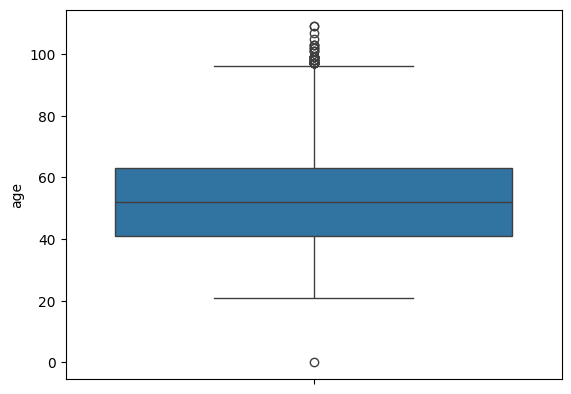

In [68]:
#Create a boxplot of the 'age' column in the 'util_droped' dataframe
sns.boxplot(util_droped['age'])

In [69]:
#Grouping the columns in 'util_droped' dataframe.
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [70]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [71]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

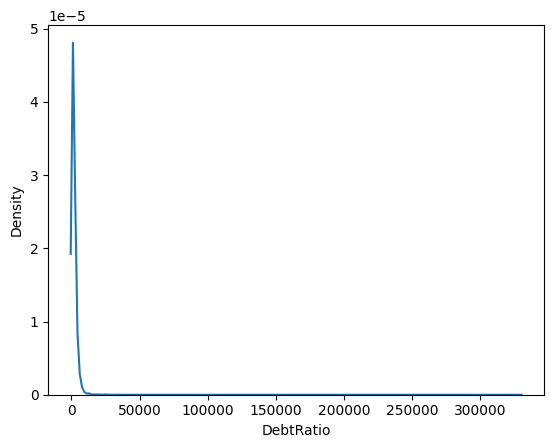

In [72]:
#Kernel Density Estimate (KDE) plot for the 'DebtRatio' column in the 'util_droped' DataFrame
sns.kdeplot(util_droped['DebtRatio'])

In [73]:
#97.5th percentile (quantile) of the 'DebtRatio'
util_droped['DebtRatio'].quantile([.975])
util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,185.000000
mean,0.064395,0.064865
std,0.245488,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [74]:
#Selecting rows from 'util_droped' where the 'DebtRatio'>3492 and 'SeriousDlqin2yrs'='MonthlyIncome'
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In [75]:
#Dropping rows from the 'util_droped' where the 'DebtRatio'>3492 and 'SeriousDlqin2yrs'='MonthlyIncome
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

In [76]:
pip install XGboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
model = XGBClassifier(tree_method = 'exact')

In [79]:
#Creating feature variables 'x' and 'y' for training the model
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [80]:
#Fitting the model to the training data.
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [81]:
#Calculating the accuracy of the model
accuracy_score(y,y_pred)

0.9465922972628301

In [82]:
#Creating the confusion matrix
cm = confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'actuals')

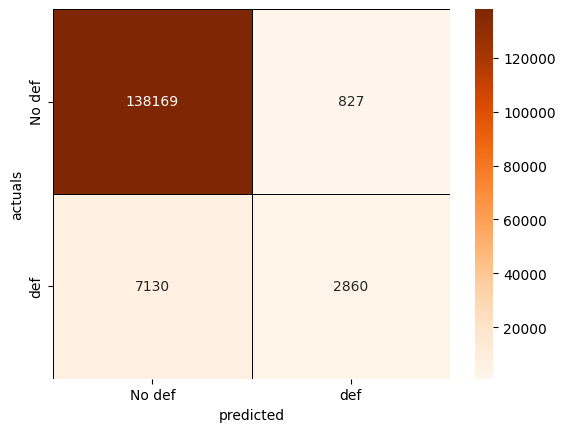

In [83]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
mpt.xticks(nmp.arange(2)+.5,['No def','def'])
mpt.yticks(nmp.arange(2)+.5,['No def','def'])
mpt.xlabel("predicted")
mpt.ylabel("actuals")

In [84]:
#Classification report for various classification metrics
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138996
           1       0.78      0.29      0.42      9990

    accuracy                           0.95    148986
   macro avg       0.86      0.64      0.70    148986
weighted avg       0.94      0.95      0.93    148986

